
🔬 Processing Region 1
Pixel scale: 0.130 arcsec = 45.99 pc


Set DATE-AVG to '2022-07-04T03:54:53.948' from MJD-AVG.
Set DATE-END to '2022-07-04T04:01:02.328' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.282938 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737445736.634 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-04T04:11:31.595' from MJD-AVG.
Set DATE-END to '2022-07-04T04:17:33.047' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.283459 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737461184.323 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-04T04:28:21.737' from MJD-AVG.
Set DATE-END to '2022-07-04T04:34:17.654' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.283980 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737476718.877 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-04T03:54:53.948' from MJD-AVG.
Set DATE-END to '2022-07-04T04:01:02.328' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.282938 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737445736.634 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

✅ Saved Region 1 spectrum to CSV

🔬 Processing Region 2
Pixel scale: 0.130 arcsec = 45.99 pc


Set DATE-AVG to '2022-07-04T03:54:53.948' from MJD-AVG.
Set DATE-END to '2022-07-04T04:01:02.328' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.282938 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737445736.634 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-04T04:11:31.595' from MJD-AVG.
Set DATE-END to '2022-07-04T04:17:33.047' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.283459 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737461184.323 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-04T04:28:21.737' from MJD-AVG.
Set DATE-END to '2022-07-04T04:34:17.654' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.283980 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737476718.877 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-04T03:54:53.948' from MJD-AVG.
Set DATE-END to '2022-07-04T04:01:02.328' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -38.282938 from OBSGEO-[XYZ].
Set OBSGEO-H to 1737445736.634 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

✅ Saved Region 2 spectrum to CSV

🔍 COMPARATIVE ANALYSIS:
Common wavelength range: 4.82 - 17.69 μm
Region_1 mean intensity: 9250.733 MJy/sr
Region_2 mean intensity: 571.058 MJy/sr


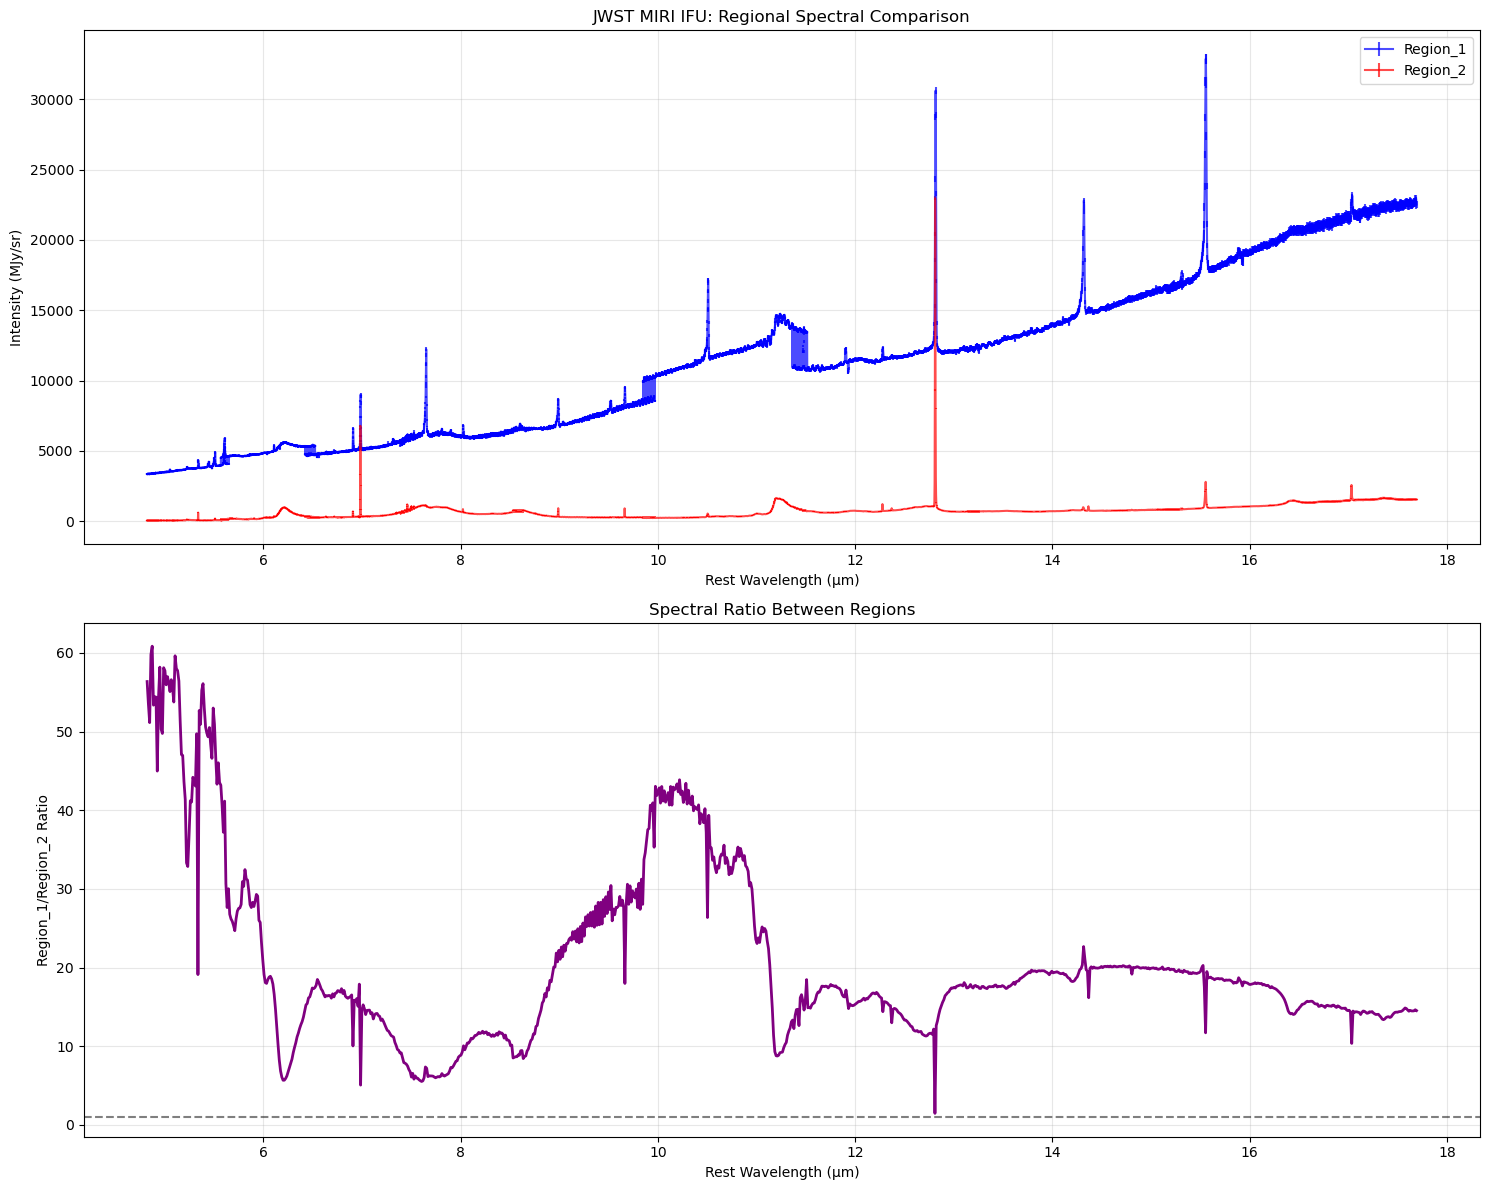


📊 Spectral line reference table saved to CSV
         wavelength       type           significance
PAH 7.7         7.7        PAH  Aromatic hydrocarbons
PAH 8.6         8.6        PAH  Aromatic hydrocarbons
[Ne VI]        7.65  Forbidden        High ionization
[Ar III]      8.991  Forbidden    Moderate ionization
H₂ S(3)        9.66  Molecular     Warm molecular gas
[S IV]        10.51  Forbidden        High ionization
PAH 11.3       11.3        PAH  Aromatic hydrocarbons


In [2]:
# Enhanced JWST MIRI Spectral Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.cosmology import Planck18
from regions import Regions
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Constants
z = 0.016268  # NGC 7469 redshift
distance = Planck18.luminosity_distance(z)  # Distance calculation

# File paths
reg_path = r"C:\Users\hardik singh\My JNpython\JWSTMIRIclass\ch1short_region.reg"
regions = Regions.read(reg_path, format='ds9')

# Generate file paths
file_paths = []
for ch_num in range(1, 4):
    for part in ['short', 'medium', 'long']:
        file_paths.append(
            fr"C:\Users\hardik singh\My JNpython\JWSTMIRIclass\jw01328-c1006_t014_miri_ch{ch_num}-{part}_s3d.fits"
        )

def calculate_pixel_scale(header, distance):
    """Calculate pixel scale in parsecs"""
    cdelt1 = abs(header.get('CDELT1', 0)) * 3600  # Convert to arcsec
    cdelt2 = abs(header.get('CDELT2', 0)) * 3600  # Convert to arcsec
    
    # Convert arcsec to parsecs at given distance
    scale_pc = distance.to(u.pc).value * np.tan(np.radians(cdelt1/3600))
    return cdelt1, scale_pc

def extract_spectrum_from_region(file_paths, region, z):
    """Extract spectrum from a single region across all files"""
    spectrum_data = []
    
    for file_path in file_paths:
        try:
            with fits.open(file_path) as hdul:
                data = hdul[1].data
                data[data < 0] = np.nan
                data_err = hdul[2].data
                header = hdul[1].header
                
                # Calculate pixel scale for first file
                if 'ch1-short' in file_path:
                    cdelt_arcsec, scale_pc = calculate_pixel_scale(header, distance)
                    print(f"Pixel scale: {cdelt_arcsec:.3f} arcsec = {scale_pc:.2f} pc")
                
                # WCS and masking
                wcs = WCS(header)
                mask = region.to_pixel(wcs.celestial).to_mask(mode='exact')
                
                # Wavelength calculation
                n_channels = data.shape[0]
                crval3 = header.get('CRVAL3')
                cdelt3 = header.get('CDELT3')
                crpix3 = header.get('CRPIX3')
                
                if None in (crval3, cdelt3, crpix3):
                    continue
                    
                wavelength = (np.arange(n_channels) - (crpix3 - 1)) * cdelt3 + crval3
                rest_wavelength = wavelength / (1 + z)
                
                # Extract spectrum
                for i in range(n_channels):
                    masked_data = np.array(mask.multiply(data[i, :, :]), dtype=float)
                    masked_err = np.array(mask.multiply(data_err[i, :, :]), dtype=float)
                    
                    avg_intensity = np.nanmean(masked_data)
                    avg_error = np.sqrt(np.nanmean(masked_err ** 2))
                    
                    if np.isnan(avg_intensity):
                        avg_intensity = 0
                    if np.isnan(avg_error):
                        avg_error = 0
                    
                    spectrum_data.append({
                        'wavelength': rest_wavelength[i],
                        'intensity': avg_intensity,
                        'error': avg_error,
                        'file': file_path.split('\\')[-1]
                    })
                    
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    # Convert to DataFrame and sort by wavelength
    df = pd.DataFrame(spectrum_data)
    df = df.sort_values('wavelength').reset_index(drop=True)
    
    return df

# Extract spectra for all regions
region_spectra = {}
for i, region in enumerate(regions):
    print(f"\n🔬 Processing Region {i+1}")
    spectrum_df = extract_spectrum_from_region(file_paths, region, z)
    region_spectra[f'Region_{i+1}'] = spectrum_df
    
    # Save to CSV
    spectrum_df.to_csv(f'region_{i+1}_spectrum.csv', index=False)
    print(f"✅ Saved Region {i+1} spectrum to CSV")

# Comparative Analysis
def compare_regions(region_spectra):
    """Compare spectral features between regions"""
    print("\n🔍 COMPARATIVE ANALYSIS:")
    
    # Find common wavelength range
    min_wl = max([df['wavelength'].min() for df in region_spectra.values()])
    max_wl = min([df['wavelength'].max() for df in region_spectra.values()])
    
    print(f"Common wavelength range: {min_wl:.2f} - {max_wl:.2f} μm")
    
    # Calculate mean intensities in common range
    for region_name, df in region_spectra.items():
        mask = (df['wavelength'] >= min_wl) & (df['wavelength'] <= max_wl)
        mean_intensity = df[mask]['intensity'].mean()
        print(f"{region_name} mean intensity: {mean_intensity:.3f} MJy/sr")

# Plotting function with enhanced features
def plot_comparative_spectra(region_spectra):
    """Create comprehensive comparison plots"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    colors = ['blue', 'red', 'green', 'orange']
    
    # Plot 1: Full spectra comparison
    for i, (region_name, df) in enumerate(region_spectra.items()):
        ax1.errorbar(df['wavelength'], df['intensity'], yerr=df['error'], 
                    label=region_name, color=colors[i], alpha=0.7)
    
    ax1.set_xlabel('Rest Wavelength (μm)')
    ax1.set_ylabel('Intensity (MJy/sr)')
    ax1.set_title('JWST MIRI IFU: Regional Spectral Comparison')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Ratio plot (if 2 regions)
    if len(region_spectra) == 2:
        region_names = list(region_spectra.keys())
        df1 = region_spectra[region_names[0]]
        df2 = region_spectra[region_names[1]]
        
        # Interpolate to common wavelength grid
        common_wl = np.linspace(
            max(df1['wavelength'].min(), df2['wavelength'].min()),
            min(df1['wavelength'].max(), df2['wavelength'].max()),
            1000
        )
        
        intensity1 = np.interp(common_wl, df1['wavelength'], df1['intensity'])
        intensity2 = np.interp(common_wl, df2['wavelength'], df2['intensity'])
        
        ratio = intensity1 / intensity2
        ax2.plot(common_wl, ratio, 'purple', linewidth=2)
        ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5)
        ax2.set_xlabel('Rest Wavelength (μm)')
        ax2.set_ylabel(f'{region_names[0]}/{region_names[1]} Ratio')
        ax2.set_title('Spectral Ratio Between Regions')
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Run the analysis
compare_regions(region_spectra)
plot_comparative_spectra(region_spectra)

# Spectral line identification table
spectral_lines = {
    'PAH 7.7': {'wavelength': 7.7, 'type': 'PAH', 'significance': 'Aromatic hydrocarbons'},
    'PAH 8.6': {'wavelength': 8.6, 'type': 'PAH', 'significance': 'Aromatic hydrocarbons'},
    '[Ne VI]': {'wavelength': 7.65, 'type': 'Forbidden', 'significance': 'High ionization'},
    '[Ar III]': {'wavelength': 8.991, 'type': 'Forbidden', 'significance': 'Moderate ionization'},
    'H₂ S(3)': {'wavelength': 9.66, 'type': 'Molecular', 'significance': 'Warm molecular gas'},
    '[S IV]': {'wavelength': 10.51, 'type': 'Forbidden', 'significance': 'High ionization'},
    'PAH 11.3': {'wavelength': 11.3, 'type': 'PAH', 'significance': 'Aromatic hydrocarbons'}
}

# Create spectral line table
line_df = pd.DataFrame(spectral_lines).T
line_df.to_csv('spectral_lines_reference.csv')
print("\n📊 Spectral line reference table saved to CSV")
print(line_df)